In [10]:
import sys
sys.path.insert(0, '../') 
import sphereGIS 
import datastructure
import numpy
import math
import shapely
import matplotlib.pyplot as plt
import geopandas

['Antigua and Barbuda', 'Aruba', 'Virgin Islands, U.S.', 'Trinidad and Tobago', 'Netherlands Antilles', 'Saint Vincent and the Grenadines', 'Grenada', 'Barbados', 'Saint Lucia', 'Saint Kitts and Nevis', 'Montserrat', 'Jamaica', 'Saint-Martin', 'Haiti', 'Guadeloupe', 'Venezuela', 'Puerto Rico', 'Dominican Republic', 'Anguilla', 'Cayman Islands', 'Turks and Caicos Islands', 'United States', 'Bahamas', 'Martinique', 'Colombia', 'Saint-Barthélemy', 'Cuba', 'Dominica', 'British Virgin Islands']


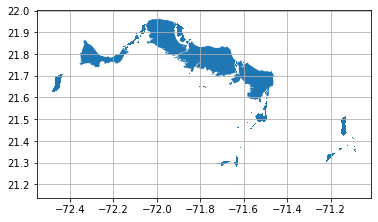

In [22]:
fig, ax = plt.subplots()
ax.grid(True)

caribbean = geopandas.read_file('data/caribbean.gpkg') 
names = list(caribbean['NAME_0'])
print(names)
polygons = caribbean[caribbean['NAME_0'] == 'Trinidad and Tobago']
polygons = caribbean[caribbean['NAME_0'] == names[20]] # 20, 25, 26

#polygons = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
#polygons = polygons[polygons.name =='United States of America']
#polygons = polygons[polygons.name =='Japan']

#polygons = geopandas.read_file('data/santa_barbara.gpkg') 

polygons.plot(ax=ax)

In [23]:
geom_type = polygons.iloc[0].geometry.type
if  geom_type == 'Polygon':
    # We drop the last point because it is a repetition of the first point
    lon = polygons.iloc[0].geometry.exterior.xy[0]
    lat = polygons.iloc[0].geometry.exterior.xy[1]
elif geom_type == 'MultiPolygon':
    lon = []
    lat = []
    for p in list(polygons.iloc[0].geometry):
        lon += p.exterior.xy[0]
        lat += p.exterior.xy[1]

In [24]:
lon = numpy.array(lon)
lat = numpy.array(lat)

# We convert to ECEF vectors
x = numpy.cos(lon/360*math.pi*2) * numpy.cos(lat/360*math.pi*2)
y = numpy.sin(lon/360*math.pi*2) * numpy.cos(lat/360*math.pi*2)
z = numpy.sin(lat/360*math.pi*2)

# We create a nx3 matrix of the points 
nodes = numpy.array([x, y, z]).transpose()

n = len(x)

In [25]:
sphereGIS.find_first_indices(lon, lat)

(12, 11)

In [26]:
ids = sphereGIS.lonlat2convex(lon, lat)
ids

array([   12,    11,  1341,  1339,  1501,  1499,  1498,  1616,  1900,
        1896,  2091,  2087,  2081,  2079, 13590, 18880, 10204,  7999,
        7929,  7923,  7921,  7919,  7861,  7860,  7822,  7820, 15654,
       15652,  3765,  3763,  3761,  3747,  3739,  3595,  3589,  3585,
        3584,  3582,    57,    53], dtype=int32)

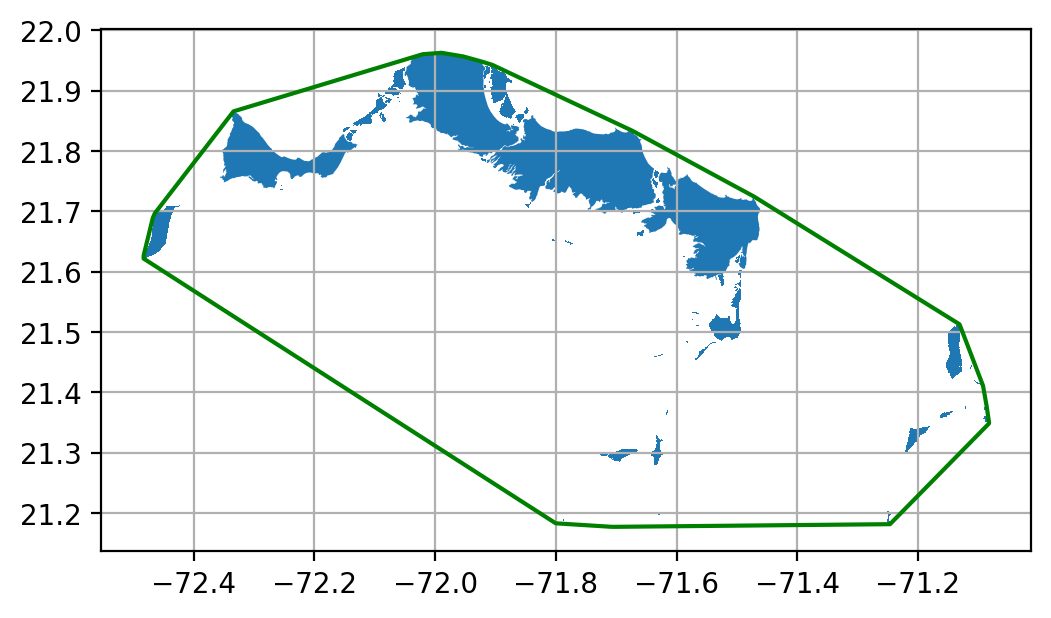

In [27]:
fig, ax = plt.subplots(dpi=200)
ax.grid(True)

geom = shapely.geometry.Polygon(zip(lon[ids], lat[ids]))
gdf = geopandas.GeoDataFrame({'geom': [geom]}).set_geometry('geom')

polygons.plot(ax=ax)
gdf.exterior.plot(ax=ax, color='g')